<a href="https://colab.research.google.com/github/sbb2002/Portfolio/blob/main/.study/Tensorflow/ML_ch7_learning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Learning rate

Learning rate는 모델 학습에 있어서 아주 중요하다. 적절한 learning rate 선정되어야 모델(graph)는 이상적인 예측에 도달할 수 있다. 그런데 만약 적정 rate보다 크거나 작다면 어떻게 될까?

> Large learning rate일 경우, \
step이 진행될 때마다 $\Delta w$도 커서 cost가 이리 튀고 저리 튄다. 심지어 rate가 너무 커버리면 cost는 발산하여 nan이라고 뜬다. 즉, 즛망(over-shooting).

> Small learning rate일 경우, \
이번에는 $\Delta w$가 너무 작아 step이 많이 진행(many iterations)되어도 cost가 global minimium에 도달하지 못하고 local minimum에 안주해버린다. 

Large rate일 때는 시원스럽게 '망함ㅋ' 라고 뜨지만, small rate의 경우는 오히려 제대로 작동된 것처럼 보여서 주의가 필요하다.

그럼 적절한 rate는 얼마일까? \
아쉽게도 그런 값은 모른다. 0.01 부터 시작해서 천천히 늘려보는/줄여보는 식으로 조절할 수 밖에 없다.

## Data preprocessing for gradient descent

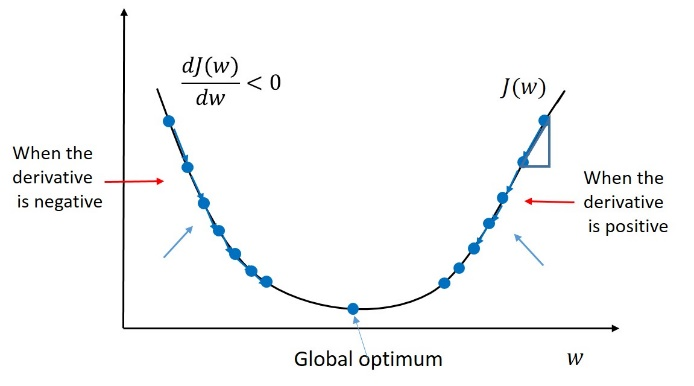

x_data가 하나일 때는 graph도 하나이다. \
당연하게도 weight도 하나이므로 w-cost plot은 위와 같다.

그런데 x_data가 여러개, 즉 multinomial classificaion graph는 어떨까?

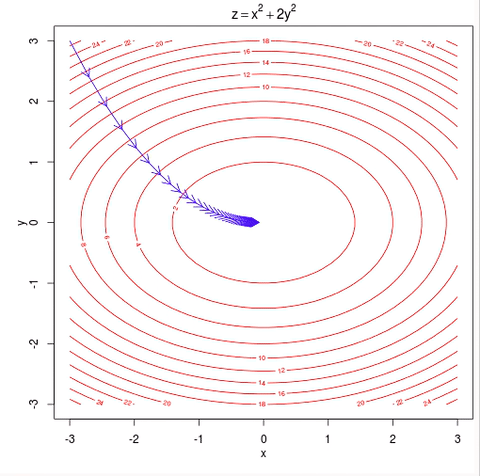

x_data가 2개인 경우는 위와 같이 생겼다. \
$w_{1}, w_{2}$ - cost plot이다. 3차원 플롯. \
그런데 여기선 cost는 감추고 $w_{1}, w_{2}$만 보여주었다. 여기서 저 등고선을 주목하자. 등고선의 중앙은 우리가 목말라 해온 그 이름, 바로 global minimum 인 것입니다-, 여러분! \
이 plot에선 다행히 등고선이 원에 가까운 형태를 그리고 있다만...

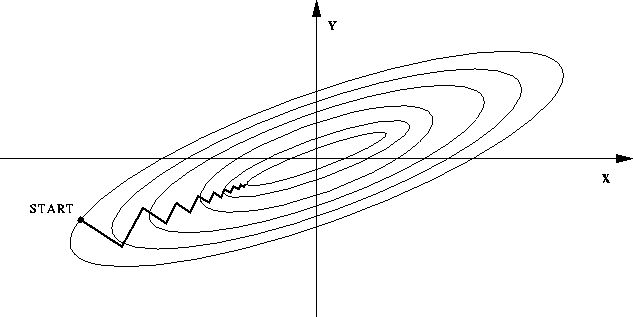

위와 같으면 어떨까? \
타원형 weight는 x_data_1의 간격과 x_data_2의 간격이 다를 때 나온다.
 
| x1 | x2 | y |
|-|-|-|
|1|1000|A|
|2|5040|A|
|4|-2300|B|
|6|-1500|B|
|8|9000|C|

이러한 plot은 영 좋지 않아요! \
learning rate는 동일한 값을 사용하다보니 그 보폭이 누구에게는 클 수도 있고 좁을 수도 있다. \
$\Delta w_{2}$가 커서 $w_{2}$은 global min.으로 수렴할 수 있지만,
$\Delta w_{1}$가 작아서 $w_{1}$는 순식간에 발산(nan)해버릴 수 있다. \
이 현상에 매우 주의해야한다.

그래서 data를 preprocessing하는 작업이 필요하다.


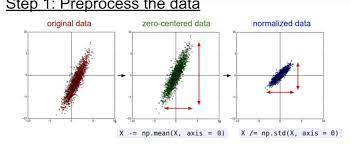

preprocessing에는 다음과 같은 기법이 있다.

* zero-centerd data:
> original data의 중점을 weight plot의 원점으로 이동시키는 방법이다.

* normalized data:
> learning rate도 잘 잡았음에도 문제가 생긴다거나 zero-centering을 했음에도 문제가 생긴다면, 위에서 말한대로 $\Delta w_{i}$가 너무 차이나는 경우이다. 이 때는 normalize해서 weight의 분포(plot에서는 모양)을 정사각하게 잡아줄 수 있다. normalize의 수식과 코드는 하술.

## Standardization ( Normalization )

Normalized coordinate $x'_{j} = \frac{x_{j} - \mu_{j}}{\sigma_{j}}$

\begin{align*}
; \text{ } & x_{j}=\text{x_data_j} \\
 & \mu_{j}=\text{평균} \\
 & \sigma_{j}=\text{분산}
\end{align*}


```
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
```



## Overfitting

* Our model is very good with training data set (w/ memorization)

* Not good at test dataset or in real use

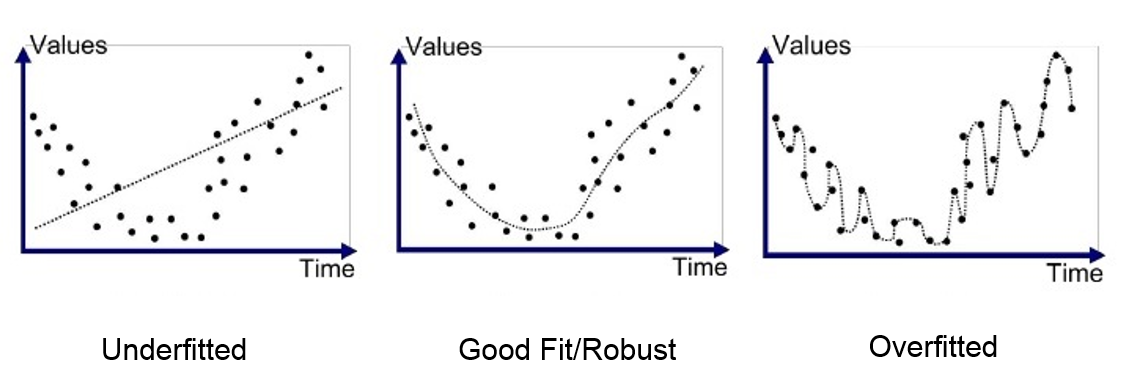

Overfitting solutions

* More training data
* Reduce the number of features
* Regularization (일반화)

Regularizaion 이란?
- Overfit된 plot, 즉 구불구불한 경계선은 weight을 너무 크게 잡아서 생긴 것이다. \
이것을 좀 펴주는 작업 (weight을 줄이는 작업) 은 cost를 손봄으로써 할 수 있다. \
이를 regularization 이라고 하고, 기존의 cost에 새로운 term을 추가하면 된다.
> $\mathcal{L} = \frac{1}{N} \sum_{i} D(S(WX_{i}+b), L_{i}) + \lambda \sum W^2 \text{(regularizaion term)} $ 
- $\lambda$를 regularizaion strength 라고 한다. \
0 이상 1 이하의 값을 가지며, 이 값이 클수록 regularization의 영향도 커진다. \
$\lambda \sum W^2$의 코드는 다음과 같다.
```
l2reg = 0.001 * tf.reduce_sum(tf.square(W))
```



# Training /Testing set

Model을 학습시킬 때 (orinigal) data set를 사용하는데, 이를 용도에 따라 쪼개놓을 수 있다.

* Training set: 공부 그 자체
 * Training set: 수학의 정석
 * Validation set: 모의고사
* Test set: 수능 수리영역(가)

**Training set**은 모델을 학습시킬 때 사용되고, \
그 후에 $\alpha , \lambda$를 조절할 때는 **Validation set**을 사용하고, \
**Test set**은 완성된 모델을 시험할 때 사용하고, 훈련할 때 이 set은 열람할 수 없다. 해서도 안되고! 

## Online learning

Training set이 100만 개 정도로 거대하다면, 10만 개씩 나눠서 model을 학습시킬 수 있다. \
한 구획(10만 개)의 학습이 끝날 때마다 결과를 업데이트하고 다음 구획으로 넘어간다.

## Accuracy

여태까지 학습시킨 모델을 Test set으로 시험한다.
* $\geqq$ 90% : Not bad
* 95% ~ 99% : (image 분야에서) Good !

# Practice 1: learning rate

In [ ]:
# Training set
x_data = [[1,2,1], [1,3,2], [1,3,4], [1,5,5], [1,7,5], [1,2,5], [1,6,6], [1,7,7]]
y_data = [[0,0,1], [0,0,1], [0,0,1], [0,1,0], [0,1,0], [0,1,0], [1,0,0], [1,0,0]]

# Test set
x_test = [[2,1,1], [3,1,2], [3,3,4]]
y_test = [[0,0,1], [0,0,1], [0,0,1]]

In [ ]:
X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([3,3]), name='weight')
b = tf.Variable(tf.random_normal([3]), name='bias')

hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

## Suite learning rate = 0.1

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Correct prediction test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
  #Initialize tf variables
  sess.run(tf.global_variables_initializer())
  for step in range(201):
    cost_val, W_val, _ = sess.run([cost, W, optimizer],
                                  feed_dict={X: x_data, Y:y_data})
    print(step, cost_val, W_val)

  # Predict
  print("\nPrediction: ", sess.run(prediction, feed_dict={X: x_test}))
  #Calculate the accuracy
  print("\nAccuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 3.584617 [[ 0.6370143  -0.47044593 -0.8695984 ]
 [ 1.8065641   0.84974885  1.1550058 ]
 [ 0.33210954  1.337534   -0.11531218]]
1 2.3783271 [[ 0.6166328  -0.48705474 -0.8326081 ]
 [ 1.7556373   0.801871    1.2538105 ]
 [ 0.31442845  1.2684512  -0.0285484 ]]
2 2.0708928 [[ 0.5926972  -0.4996407  -0.7960865 ]
 [ 1.6845822   0.775411    1.3513256 ]
 [ 0.27661914  1.2204329   0.05727922]]
3 1.7738547 [[ 0.5729242  -0.5153074  -0.76064676]
 [ 1.6343749   0.73169214  1.445252  ]
 [ 0.25783464  1.1562217   0.14027488]]
4 1.5052145 [[ 0.5516802  -0.52678823 -0.72792196]
 [ 1.5743365   0.70921564  1.5277668 ]
 [ 0.22788253  1.1129947   0.21345401]]
5 1.3186786 [[ 0.5368786  -0.53769076 -0.7022179 ]
 [ 1.5481644   0.6884727   1.5746819 ]
 [ 0.22709608  1.0719824   0.25525278]]
6 1.262842 [[ 0.5243552  -0.5424268  -0.6849584 ]
 [ 1.5352594   0.70009124  1.5759684 ]
 [ 0.2356085   1.0632194   0.25550333]]
7 1.2494242 [[ 0.5132724  -0.54750013 -0.6688023 ]
 [ 1.5298116   0.7097857   1.5717217 ]
 [

아주 잘 예측했다! step을 거듭할 때마다 cost가 줄어드는 것도 보인다.

## BIG learning rate = 1.5

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.5).minimize(cost)

# Correct prediction test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
  #Initialize tf variables
  sess.run(tf.global_variables_initializer())
  for step in range(201):
    cost_val, W_val, _ = sess.run([cost, W, optimizer],
                                  feed_dict={X: x_data, Y:y_data})
    print(step, cost_val, W_val)

  # Predict
  print("\nPrediction: ", sess.run(prediction, feed_dict={X: x_test}))
  #Calculate the accuracy
  print("\nAccuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 5.1377463 [[ 0.03920012 -1.5656136   1.6948698 ]
 [ 2.6318998  -2.4185195   1.4866413 ]
 [ 0.16367686 -4.065566    0.31136182]]
1 19.602947 [[-1.02778   -1.0031136  2.1993499]
 [-1.3572288  0.2064805  2.8507695]
 [-3.75975   -1.2530661  1.4222887]]
2 27.171936 [[-0.65278006 -0.4406147   1.261851  ]
 [ 1.0802712   2.8314784  -2.2117283 ]
 [-1.3222499   1.5594329  -3.8277102 ]]
3 16.650372 [[-0.27852994 -1.3773648   1.8243508 ]
 [ 3.5162642  -1.1045142  -0.7117285 ]
 [ 1.1144929  -2.1898098  -2.5152102 ]]
4 22.749153 [[-1.4035279  -0.81486475  2.386849  ]
 [-0.6087315   1.5204858   0.7882675 ]
 [-3.010505    0.6226902  -1.202712  ]]
5 10.292133 [[-1.0285516  -1.5921581   2.789166  ]
 [ 1.8287206  -2.067245    1.9385461 ]
 [-0.5730291  -2.9348323  -0.08266547]]
6 16.784279 [[-0.6569289  -1.0296581   1.8550434 ]
 [ 4.256586    0.557755   -3.1143193 ]
 [ 1.8565209  -0.12233233 -5.3247156 ]]
7 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
8 nan [[nan nan nan]
 [nan nan nan]
 [nan nan n

7th step부터 cost = nan 으로 점철된다. 학습을 포기해버렸다...

## small learning rate = 1e-10

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-10).minimize(cost)

# Correct prediction test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
  #Initialize tf variables
  sess.run(tf.global_variables_initializer())
  for step in range(201):
    cost_val, W_val, _ = sess.run([cost, W, optimizer],
                                  feed_dict={X: x_data, Y:y_data})
    print(step, cost_val, W_val)

  # Predict
  print("\nPrediction: ", sess.run(prediction, feed_dict={X: x_test}))
  #Calculate the accuracy
  print("\nAccuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 8.218239 [[-0.6528866  -0.7598963  -0.26686344]
 [-1.3837956  -1.069056   -0.14403026]
 [ 0.5459374  -0.82989234  1.2559648 ]]
1 8.218239 [[-0.6528866  -0.7598963  -0.26686344]
 [-1.3837956  -1.069056   -0.14403026]
 [ 0.5459374  -0.82989234  1.2559648 ]]
2 8.218239 [[-0.6528866  -0.7598963  -0.26686344]
 [-1.3837956  -1.069056   -0.14403026]
 [ 0.5459374  -0.82989234  1.2559648 ]]
3 8.218239 [[-0.6528866  -0.7598963  -0.26686344]
 [-1.3837956  -1.069056   -0.14403026]
 [ 0.5459374  -0.82989234  1.2559648 ]]
4 8.218239 [[-0.6528866  -0.7598963  -0.26686344]
 [-1.3837956  -1.069056   -0.14403026]
 [ 0.5459374  -0.82989234  1.2559648 ]]
5 8.218239 [[-0.6528866  -0.7598963  -0.26686344]
 [-1.3837956  -1.069056   -0.14403026]
 [ 0.5459374  -0.82989234  1.2559648 ]]
6 8.218239 [[-0.6528866  -0.7598963  -0.26686344]
 [-1.3837956  -1.069056   -0.14403026]
 [ 0.5459374  -0.82989234  1.2559648 ]]
7 8.218239 [[-0.6528866  -0.7598963  -0.26686344]
 [-1.3837956  -1.069056   -0.14403026]
 [ 0.545

잘(?) 된거 같지만... 1 ~ 200 step까지 cost가 거의 같다. local minimum에 수렴해버린 증거이다! \
+) 다시 시도하면 틀리기도 한다. \
지금이야 괜찮아보이지만, 실제 운용할 때는 아주 형편없는 예측을 하게 될 것이다.

# Practice 2: Non-normalized inputs

In [ ]:
import numpy as np

In [ ]:
np.random.seed(777)

In [ ]:
# ???? data (편차가 매우 크다)
xy = np.random.rand(8,5) * np.random.randint(0,1e+4)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [ ]:
# Simple, but nice model!
X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 1])
W = tf.Variable(tf.random_normal([4,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X,W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
  cost_val, hy_val, _ = sess.run(
      [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
  print(step, "Cost: ", cost_val, "\nPrediction: ", hy_val)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1446 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1447 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1448 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1449 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1450 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1451 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1452 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1453 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1454 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1455 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1456 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]


model graph 설계는 아주 nice함에도 불구하고 nan랄병이 난다. \
바로 input data(xy)가 normalized 되지않아서 그렇다. \
위의 타원 weight plot을 생각해보자. \
그럴땐 min-max scaler을 이용해 normalize해보자.

In [ ]:
# MinMaxScaler: sklearn.preprocessing 에도 있으나 type에 대한 이슈가 있으니 교재를 참고해서 함
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [ ]:
xy = MinMaxScaler(xy)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [ ]:
# Simple, but nice model!
X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 1])
W = tf.Variable(tf.random_normal([4,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X,W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
  cost_val, hy_val, _ = sess.run(
      [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
  print(step, "Cost: ", cost_val, "\nPrediction: ", hy_val)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [-1.6266239 ]
 [-1.4621919 ]
 [-1.2384542 ]
 [-1.1119721 ]
 [-1.4633914 ]]
1446 Cost:  3.897859 
Prediction:  [[-0.609495 ]
 [-1.883208 ]
 [-1.5241351]
 [-1.6265388]
 [-1.4621371]
 [-1.2383755]
 [-1.1118946]
 [-1.4633048]]
1447 Cost:  3.8975718 
Prediction:  [[-0.60944057]
 [-1.8831102 ]
 [-1.5240784 ]
 [-1.6264536 ]
 [-1.4620823 ]
 [-1.2382969 ]
 [-1.1118171 ]
 [-1.4632181 ]]
1448 Cost:  3.897285 
Prediction:  [[-0.6093861]
 [-1.8830123]
 [-1.5240216]
 [-1.6263684]
 [-1.4620274]
 [-1.2382182]
 [-1.1117395]
 [-1.4631314]]
1449 Cost:  3.8969975 
Prediction:  [[-0.6093316]
 [-1.8829143]
 [-1.523965 ]
 [-1.6262833]
 [-1.4619725]
 [-1.2381395]
 [-1.1116619]
 [-1.4630449]]
1450 Cost:  3.8967104 
Prediction:  [[-0.6092771]
 [-1.8828163]
 [-1.5239081]
 [-1.626198 ]
 [-1.4619176]
 [-1.2380608]
 [-1.1115844]
 [-1.4629582]]
1451 Cost:  3.8964233 
Prediction:  [[-0.60922265]
 [-1.8827186 ]
 [-1.5238514 ]
 [-1.626113  ]
 [-1.4618628 ]
 [-1.2379822 ]
 [-1.111506

이제 문제없이 잘 예측해내는 걸 볼 수 있다. 경사났네, 경사났어!

# Practice 3: MNIST Dataset

손으로 쓴 우편번호 숫자를 인식해보는 실습이다.

## Intro

* image size
 > 28 x 28 x 1 = 784

* One-hot encoding required!
 > 0 ~ 9 digits = 10개

* MNIST datasets
 > 데이터 이전함. ( tf v2.x ) \
 https://stackoverflow.com/questions/50313441/modulenotfounderror-no-module-named-tensorflow-examples 참고.
 ```
mnist = tf.keras.datasets.mnist
 ```

* Tensorflow version issue
> 기존엔 v1.0에선 모든 것을 코딩하여 접근했으나, \
v2.0 을 사용하면서 기존과 아예 다른 방법으로 접근한다. \
tf.placeholder(), tf.Session() 등을 더이상 사용하지 않는다. \
아예 다른 방법으로 시도하니 익숙해질 것.

## Body

tensorflow v2.0 으로 업그레이드되면서 v1.0과 사용법이 완전 다르게 바뀌었다. 다른 library라고 봐도 무방할 정도. \
tf2.0에 내재된 keras를 이용하여 normalize하고 training하고 수식 안쓰고 지혼자 북치고 장구치고 다 한다. \
그러니 tf2.0하고 이참에 친해져보자...

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
print("Mnist dataset download completed.")

# Define the variables & allot data for use
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0   # Normalize
print("Normalization done.")

# Linear classifier
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #28 by 28 mnist input flatten
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)

Mnist dataset download completed.
11493376/11490434 [==============================] - 0s 0us/step
Normalization done.
Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.7896 - acc: 0.8116
Epoch 2/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4562 - acc: 0.8815
Epoch 3/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4030 - acc: 0.8908
Epoch 4/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3765 - acc: 0.8968
Epoch 5/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3597 - acc: 0.9006
Epoch 6/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3479 - acc: 0.9035
Epoch 7/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3389 - acc: 0.9058
Epoch 8/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3317 - acc: 0.9079
Epoch 9/20
60000/60000 [==================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
model.metrics_names         # model.fit or model.evaluate의 출력값 keys

['loss', 'acc']

In [ ]:
print("Loss: ", "{:.4f}".format(loss), "\tAcc.: ", "{:.2%}".format(accuracy))

Loss:  0.2871 	Acc.:  91.91%


In [ ]:
# Realtime monitor
import matplotlib.pyplot as plt
import random

# 임의의 손글씨를 출력
print("손 글씨: ")
r = random.randint(0, 10000)
plt.imshow(x_test[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

# model로 예측(판독)한 숫자 출력
print("\n판독: ")   # probability -> one-hot encoding 필요
prob = model.predict(x_test[r:r+1])
print(tf.math.argmax(prob, axis=1).eval(session=sess))    # one-hot encoding

손 글씨: 


NameError: ignored

## Conclusion

재밌게도 ctrl+enter로 계속 시도하다보면 신기하게 잘 맞춘다! \
물론 가끔 외계인 글자를 보면 사람인 나도 잘 모르겠는데 모델도 일단 틀리거나 말거나 최빈확률의 예측값을 보여준다. \
**WA! keras 아시는구나!!**